# Sparse Matrices

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import sparse
import scipy.sparse.linalg
from scipy import linalg
import pandas as pd

## 1. Sparsity

In [67]:
N = 250 
A = sparse.random(N, N, density=0.015)
density = A.nnz / N**2
print('Number of non-zeros: {}, density: {}'.format(dummy.nnz, density))

Number of non-zeros: 937, density: 0.014992


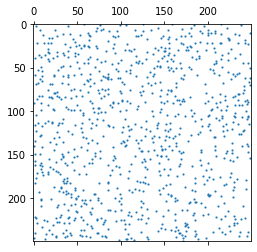

In [68]:
plt.spy(A, markersize=1);

In [69]:
print(A)

  (227, 81)	0.1326645445791903
  (65, 62)	0.7290322288178251
  (91, 197)	0.23353943693604096
  (47, 112)	0.9464389301588747
  (206, 77)	0.807115353824778
  (164, 128)	0.9133086925643228
  (167, 46)	0.5283786515002297
  (89, 128)	0.37399315957186363
  (6, 117)	0.016794808747604528
  (49, 71)	0.24399016153471587
  (160, 8)	0.4383032827603819
  (10, 249)	0.8674899825920094
  (240, 168)	0.6812603668383483
  (146, 123)	0.16439807307137955
  (97, 22)	0.7414356496177178
  (88, 201)	0.5744381609765122
  (118, 103)	0.3268795098269518
  (44, 63)	0.4975576332824254
  (69, 58)	0.05931926165446033
  (51, 181)	0.9912515618078191
  (107, 231)	0.051173832450227774
  (45, 125)	0.311300498991254
  (133, 107)	0.2450802788217784
  (31, 39)	0.9002641033257277
  (10, 179)	0.30649817319618244
  :	:
  (116, 86)	0.478624599054708
  (54, 97)	0.2766656915242318
  (129, 110)	0.6222668820627479
  (159, 64)	0.6933979537651905
  (77, 99)	0.22129277167538441
  (63, 85)	0.7971122100419404
  (102, 232)	0.12946641086141

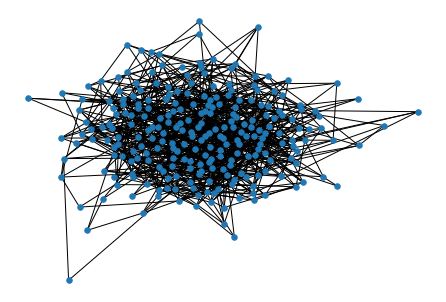

In [71]:
import networkx as nx
 
# Create a networkx graph object from sparse matrix
G = nx.from_scipy_sparse_matrix(A)
 
# Draw the resulting graph
nx.draw(G, node_size=30, with_labels=False)